In [1]:
import os

os.chdir("../../")

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from src.data_handling import ingestion

sns.set_theme(context="paper", font_scale=2.0, style="whitegrid")

In [2]:
ncg_prices, gaspool_prices, the_prices = ingestion.read_imbalance_prices()
prices = pd.concat([(ncg_prices + gaspool_prices).dropna() / 2, the_prices])

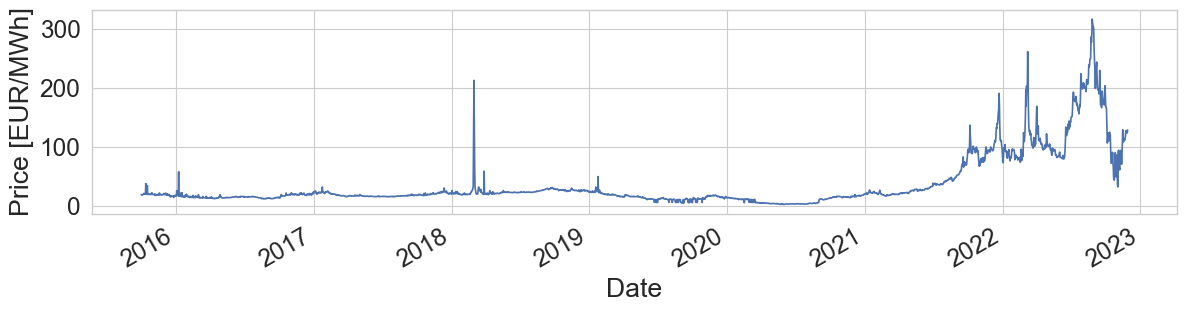

In [3]:
fig, ax = plt.subplots(figsize=(14, 3))
prices.plot(ax=ax)
ax.set_ylabel("Price [EUR/MWh]")

# Save plot
fig.savefig("diagrams/data_analysis_004_001.svg", format="svg", bbox_inches="tight")

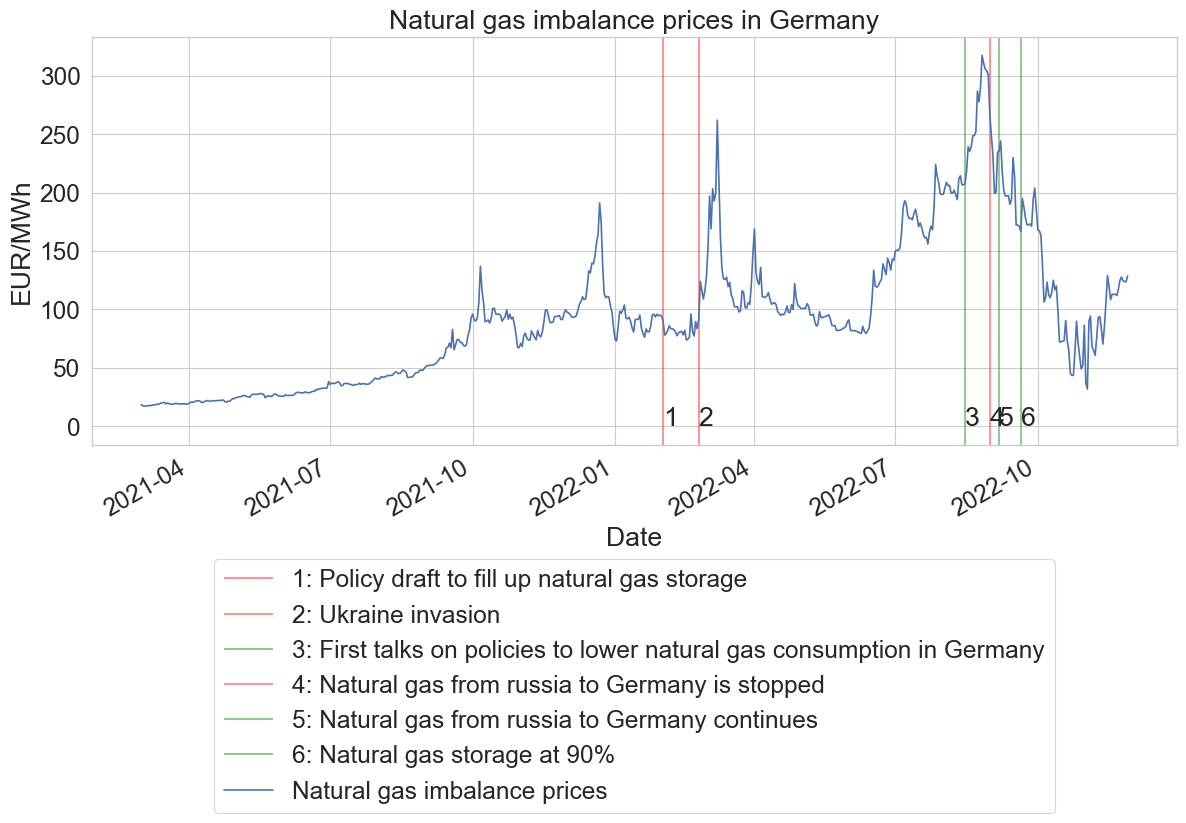

In [7]:
fig, ax = plt.subplots(figsize=(14, 6))

# Policy draft to fill up natural gas storage
ax.vlines(
    pd.Timestamp("2022-02-01"),
    0,
    1,
    transform=ax.get_xaxis_transform(),
    color="red",
    alpha=0.5,
)
ax.annotate("1", xy=(pd.Timestamp("2022-02-01"), 0.5))

# Ukraine invasion
ax.vlines(
    pd.Timestamp("2022-02-24"),
    0,
    1,
    transform=ax.get_xaxis_transform(),
    color="red",
    alpha=0.5,
)
ax.annotate("2", xy=(pd.Timestamp("2022-02-24"), 0.5))

# First talks on policies to lower natural gas consumption in Germany
ax.vlines(
    pd.Timestamp("2022-08-15"),
    0,
    1,
    transform=ax.get_xaxis_transform(),
    color="green",
    alpha=0.5,
)
ax.annotate("3", xy=(pd.Timestamp("2022-08-15"), 0.5))

# Natural gas from russia to Germany is stopped
ax.vlines(
    pd.Timestamp("2022-08-31"),
    0,
    1,
    transform=ax.get_xaxis_transform(),
    color="red",
    alpha=0.5,
)
ax.annotate("4", xy=(pd.Timestamp("2022-08-31"), 0.5))

# Natural gas from russia to Germany continues
ax.vlines(
    pd.Timestamp("2022-09-06"),
    0,
    1,
    transform=ax.get_xaxis_transform(),
    color="green",
    alpha=0.5,
)
ax.annotate("5", xy=(pd.Timestamp("2022-09-06"), 0.5))

# Natural gas storage at 90%
ax.vlines(
    pd.Timestamp("2022-09-20"),
    0,
    1,
    transform=ax.get_xaxis_transform(),
    color="green",
    alpha=0.5,
)
ax.annotate("6", xy=(pd.Timestamp("2022-09-20"), 0.5))

prices.loc["2021-03-01":].plot(ax=ax)
ax.legend(
    [
        "1: Policy draft to fill up natural gas storage",
        "2: Ukraine invasion",
        "3: First talks on policies to lower natural gas consumption in Germany",
        "4: Natural gas from russia to Germany is stopped",
        "5: Natural gas from russia to Germany continues",
        "6: Natural gas storage at 90%",
        "Natural gas imbalance prices",
    ],
    loc='upper center',
    bbox_to_anchor=(0.5, -0.25),
    ncol=1,
)

ax.set_title("Natural gas imbalance prices in Germany")
ax.set_ylabel("EUR/MWh")

# Save plot
fig.savefig("diagrams/data_analysis_004_002.svg", format="svg", bbox_inches="tight")